In [1]:
# import module

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
import plotly.express as px
import collections.abc
collections.Iterable = collections.abc.Iterable
from astrodendro import Dendrogram
from astrodendro import structure
import pandas as pd

In [2]:
# load data

d1000 = np.load("datasets/1000.npz")
m1000 = d1000["arr_2"]

rv = d1000['arr_0']
pc = d1000['arr_1']

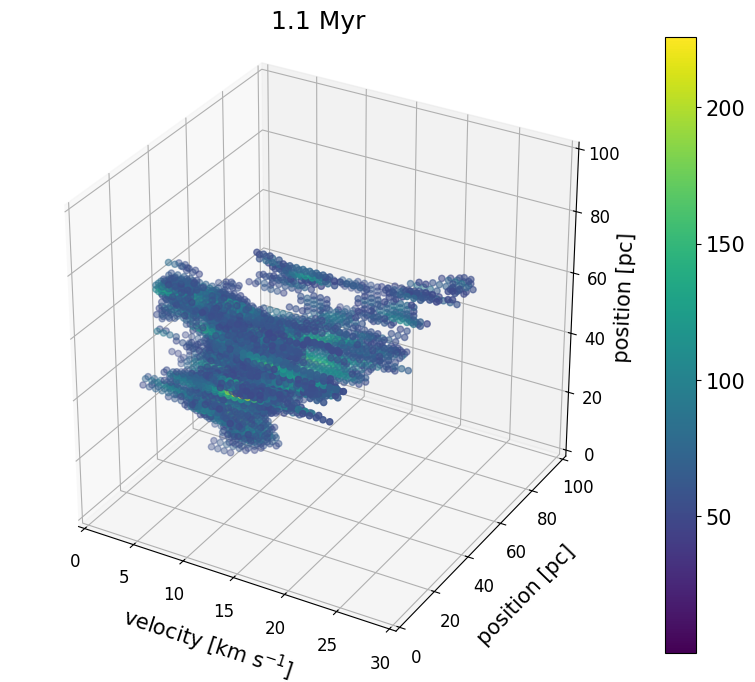

In [17]:
# make 3D map

shape = m1000.shape
gas_mass = m1000.reshape(-1)
colormap = plt.get_cmap('viridis')
norm = plt.Normalize(gas_mass.min(), gas_mass.max())

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect((1,1,1))

x_coords = np.repeat(np.arange(shape[0]), shape[1]*shape[2]) * rv
y_coords = np.tile(np.repeat(np.arange(shape[1]), shape[2]), shape[0]) * pc
z_coords = np.tile(np.arange(shape[2]), shape[0]*shape[1]) * pc

threshold = 50
mask= gas_mass > threshold

x_filtered = x_coords[mask]
y_filtered = y_coords[mask]
z_filtered = z_coords[mask]
gas_mass_filtered = gas_mass[mask]

scatter = ax.scatter(x_filtered, y_filtered, z_filtered, c=gas_mass_filtered, cmap=colormap, norm=norm)  

cbar = plt.colorbar(scatter, ax=ax, orientation='vertical')

ax.set_xlim3d(0, 30)
ax.set_ylim3d(0, 100)
ax.set_zlim3d(0, 100)

plt.title("1.1 Myr")

X = ax.set_xlabel('velocity [km s$^{-1}$]', labelpad=10)
Y = ax.set_ylabel('position [pc]', labelpad=10)
Z = ax.set_zlabel('position [pc]', labelpad=4)
plt.tick_params(labelsize=12)

plt.savefig("3Dmap_1000")

In [4]:
# compute dendrogram

dendro3D_1000 = Dendrogram.compute(m1000, min_value=90, min_delta=20, min_npix=50)

In [5]:
# make index

leaf_indices = [i for i, structure in enumerate(dendro3D_1000.all_structures) if structure.is_leaf]
branch_indices = [j for j, structure in enumerate(dendro3D_1000.all_structures) if structure.is_branch]

print(leaf_indices)
print(branch_indices)

[0, 2, 3, 4]
[1]


In [6]:
# check the size of structures

leaf_npix, branch_npix = [], []

for structure_index in leaf_indices:
    structure = dendro3D_1000[structure_index]
    npix = structure.get_npix()
    leaf_npix.append(npix)
    
for structure_index in branch_indices:
    structure = dendro3D_1000[structure_index]
    npix = structure.get_npix()
    branch_npix.append(npix)

leaf_sizes = leaf_npix * rv * pc**2
branch_sizes = branch_npix * rv * pc**2

print(leaf_sizes)
print(branch_sizes)

[ 151.95654452 1022.59281188  539.3211785    74.73272681]
[193.05954427]


In [7]:
# check the mass of structures

mass_per_leaf, mass_per_branch = [], []

for structure_index in leaf_indices:
    structure = dendro3D_1000[structure_index]
    mask = structure.get_mask()
    indices = np.where(mask)
    leaf_mass = np.sum(m1000[indices])
    mass_per_leaf.append(leaf_mass)
    
for structure_index in branch_indices:
    structure = dendro3D_1000[structure_index]
    mask = structure.get_mask()
    indices = np.where(mask)
    branch_mass = np.sum(m1000[indices])
    mass_per_branch.append(branch_mass)

total_mass_leaf = np.sum(mass_per_leaf)
total_mass_branch = np.sum(mass_per_branch)

print(mass_per_leaf)
print(total_mass_leaf)
print(mass_per_branch)
print(total_mass_branch)

[14042.495500216259, 97094.86945336807, 53638.78286336835, 7369.953795595795]
172146.10161254846
[20852.475386424907]
20852.475386424907


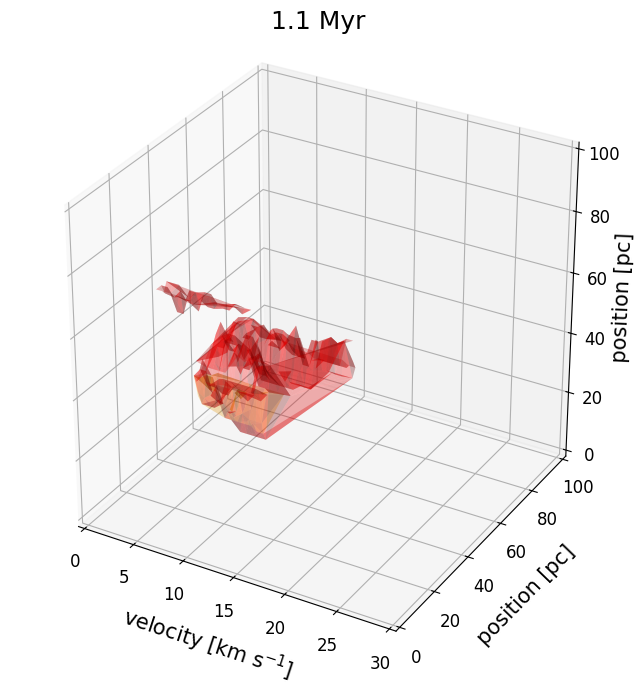

In [22]:
# plot the contour

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect((1,1,1))

for i, structure_index in enumerate(leaf_indices):
    structure = dendro3D_1000[structure_index]
    mask = structure.get_mask()
    indices = np.where(mask)
    ax.plot_trisurf(indices[0] * rv, indices[1] * pc, indices[2] * pc, color='red', alpha=0.3)
    
for j, structure_index in enumerate(branch_indices):
    structure = dendro3D_1000[structure_index]
    mask = structure.get_mask()
    indices = np.where(mask)
    ax.plot_trisurf(indices[0] * rv, indices[1] * pc, indices[2] * pc, color='orange', alpha=0.3)

ax.set_xlim3d(0, 30)
ax.set_ylim3d(0, 100)
ax.set_zlim3d(0, 100)

plt.title("1.1 Myr")

X = ax.set_xlabel('velocity [km s$^{-1}$]', labelpad=10)
Y = ax.set_ylabel('position [pc]', labelpad=10)
Z = ax.set_zlabel('position [pc]', labelpad=3)
plt.tick_params(labelsize=12)

plt.savefig("dendro3D_1000_contour")

In [9]:
# make peaks list

x_peak, y_peak, v_peak, peak_value = [], [], [], []
for s in dendro3D_1000.leaves:
    x_ch, y_ch, v_ch = s.get_peak()[0]
    value = s.get_peak()[1]
    x_peak.append(round(float(x_ch), 6))
    y_peak.append(round(float(y_ch), 6))
    v_peak.append(round(float(v_ch), 6))
    peak_value.append(round(float(value), 6))
    
peak = pd.DataFrame({'v_peak':x_peak * rv, 'y_peak':y_peak * pc, 'z_peak':v_peak * pc, 'peak_value':peak_value})

print(peak)

   v_peak     y_peak     z_peak  peak_value
0    2.60  44.296875  52.602539  184.700366
1    5.85  44.296875  22.148438  215.357836
2    8.45  52.602539  33.222656  210.292285
3    9.75  31.838379  34.606934  225.966371


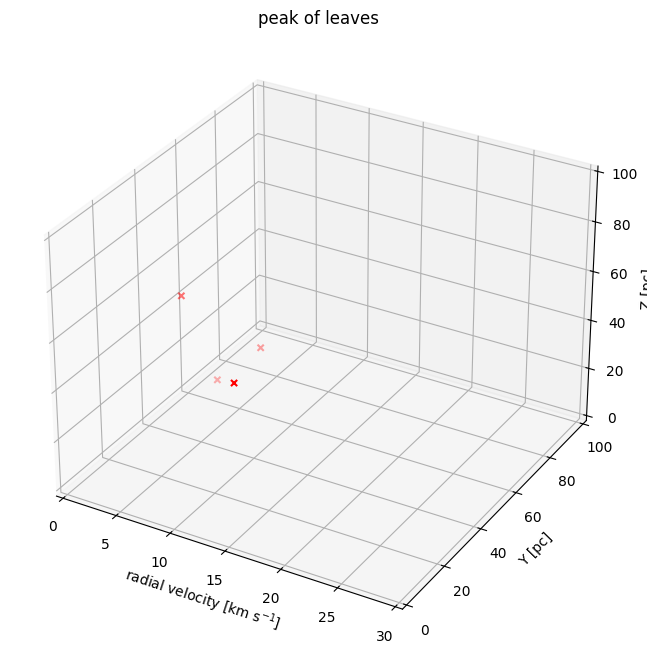

In [10]:
# plot the peaks

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(peak['v_peak'], peak['y_peak'], peak['z_peak'], marker='x', color='red')

ax.set_xlim3d(0, 30)
ax.set_ylim3d(0, 100)
ax.set_zlim3d(0, 100)

plt.title('peak of leaves')

X = ax.set_xlabel('radial velocity [km s$^{-1}$]')
Y = ax.set_ylabel('Y [pc]')
Z = ax.set_zlabel('Z [pc]')

#plt.savefig('dendro3D_1000_peak')

In [11]:
# plot by plotly

fig = px.scatter_3d(peak, x='v_peak', y='y_peak', z='z_peak')

# Leaf structures
for i, leaf_structure_index in enumerate(leaf_indices):
    leaf_structure = dendro3D_1000[leaf_structure_index]
    leaf_mask = leaf_structure.get_mask()
    leaf_mask_indices = np.where(leaf_mask)
    mesh_leaf = go.Mesh3d(x=leaf_mask_indices[0] * rv, 
                          y=leaf_mask_indices[1] * pc, 
                          z=leaf_mask_indices[2] * pc, 
                          opacity=0.3,
                          color='red',
                          name=f'Leaf {i + 1} - Surface')
    fig.add_trace(mesh_leaf)

# Branch structures
for j, branch_structure_index in enumerate(branch_indices):
    branch_structure = dendro3D_1000[branch_structure_index]
    branch_mask = branch_structure.get_mask()
    branch_mask_indices = np.where(branch_mask)
    mesh_branch = go.Mesh3d(x=branch_mask_indices[0] * rv, 
                            y=branch_mask_indices[1] * pc, 
                            z=branch_mask_indices[2] * pc,
                            opacity=0.3, 
                            color='orange',
                            name=f'Branch {j + 1} - Surface')
    fig.add_trace(mesh_branch)

fig.update_layout(
    scene=dict(
        xaxis=dict(title='radial velocity [km/s]', range=[0, 30]),
        yaxis=dict(title='Y [pc]', range=[0, 100]),
        zaxis=dict(title='Z [pc]', range=[0, 100]),
        aspectratio=dict(x=1, y=1, z=1)
    ),
    title='Structure Contours in 3D with Mesh Surface',
    margin=dict(l=0, r=0, b=0, t=40),
    showlegend=True)


In [12]:
# calculate radius

leaf_radius = np.cbrt(3 * (np.array(leaf_sizes)) / (4 * np.pi)) 
branch_radius = np.cbrt(3 * (np.array(branch_sizes)) / (4 * np.pi)) 

print(leaf_radius)
print(branch_radius)

[3.31037302 6.24987563 5.04955324 2.613008  ]
[3.585372]


In [13]:
# calculate velocity dispersion

delta_rv_leaf, delta_rv_branch = [], []

for structure_index in leaf_indices:
    structure = dendro3D_1000[structure_index]
    mask = structure.get_mask()
    indices = np.where(mask)
    rv_indices = indices[0] * rv
    delta_rv = np.var(rv_indices)
    delta_rv_leaf.append(delta_rv)
    
for structure_index in branch_indices:
    structure = dendro3D_1000[structure_index]
    mask = structure.get_mask()
    indices = np.where(mask)
    rv_indices = indices[0] * rv
    delta_rv = np.var(rv_indices)
    delta_rv_branch.append(delta_rv)
    
print(delta_rv_leaf)
print(delta_rv_branch)

[3.4162207739854886, 7.7650914336071555, 6.87421915419038, 2.2092055555555556]
[3.2870763787721127]


In [14]:
# calculate virial parameter

alpha_vir_leaf = (1.2 * 10**3 * np.array(leaf_radius) * np.array(delta_rv_leaf)**2 / (3 * np.array(mass_per_leaf)))
alpha_vir_branch = (1.2 * 10**3 * np.array(branch_radius) * np.array(delta_rv_branch)**2 / (3 * np.array(mass_per_branch)))
                     
print(alpha_vir_leaf)
print(alpha_vir_branch)

[1.10048592 1.55248793 1.77942947 0.69216274]
[0.74311527]
